# Some useful tools

In [3]:
import pandas as pd
import numpy as np

from numpy.random import default_rng

rng = default_rng()


In [4]:
def report(df):
    ## return a string with the standard deviation and mean of the
    ## DataFrame df
    return "\n".join([f"std:  {df.std().values}",
                      f"variance: {df.var().values}",
                      f"mean: {df.mean().values}"])

#------------------------------

results=[0,1]

## use  rng.choice([...],n) to pick n random elements from the list [...]

def coin_toss_trial(num_tosses):
    return pd.DataFrame(rng.choice(results,num_tosses)).mean()

def coin_distribution(num_trials,num_tosses):
    return pd.DataFrame(map(coin_toss_trial,num_trials*[num_tosses]))

cd_100=coin_distribution(3000,100)

std:  [0.05020218]
variance: [0.00252026]
mean: [0.50160667]


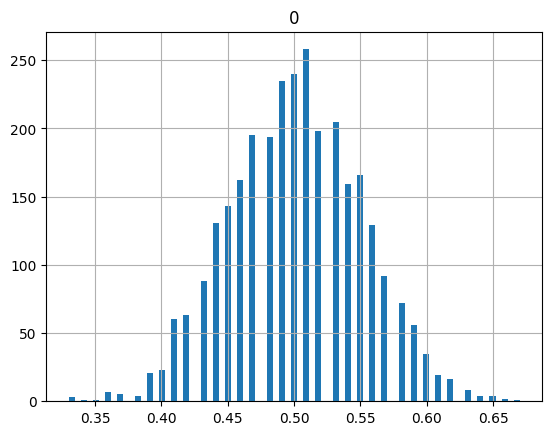

In [7]:
cd_100.hist(bins=75)
print(report(cd_100))

Monte-carlo integration
=======================

Approximating 

$$\int_1^3 x^3 dx = \dfrac{1}{4} x^4 \bigg \vert^3_1 = \dfrac{81 - 1}{4} = \dfrac{80}{4} = 20$$
    


In [35]:
def in_region(x,y):
    return y < x**3

def approx(N):
    xl = 1+2*rng.random(N)
    yl = 27*rng.random(N)
    M = 0
    for i in range(N):
        if in_region(xl[i],yl[i]):
            M = M+1
    return 2*27.*M/N


In [36]:
approx(10000)

20.2554

In [40]:
approx_data = pd.DataFrame([approx(10000) for i in range(50)])

In [41]:
print(report(approx_data))

std:  [0.2613967]
variance: [0.06832824]
mean: [20.002032]


Monte Carlo Simulation
======================

In [42]:

def customer(prob=1./7):
    return rng.choice([1,0],p=[prob,1-prob])


class JFTE():
    def __init__(self,N,prob=1./7):
        self.customers = [customer(prob) for n in range(N)]
        self.reset()
    
    def reset(self):
        self.stock = 1
        self.sales = 0
        self.lost_sales = 0
        self.storage_days = 0
        self.max_stock = 1
    
    def num_days(self):
        return len(self.customers)
    
    def add_stock(self):
        self.stock = self.stock + 1
        if self.stock > self.max_stock:
            self.max_stock = self.stock
    
    def sale(self):
        self.stock = self.stock - 1
        self.sales = self.sales + 1
        
    def result(self):
        return result(self.num_days(),self.sales,self.lost_sales,
                      self.storage_days,self.max_stock)

In [54]:
dow_name_dict = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}

def dow_name(n):
    if np.mod(n,7)==3:
        return f"!!{dow_name_dict[np.mod(n,7)]}"
    else:
        return dow_name_dict[np.mod(n,7)]
        
for i in range(35):
    print(f"{i:02d} {dow_name(i)}")

00 Sun
01 Mon
02 Tue
03 !!Wed
04 Thu
05 Fri
06 Sat
07 Sun
08 Mon
09 Tue
10 !!Wed
11 Thu
12 Fri
13 Sat
14 Sun
15 Mon
16 Tue
17 !!Wed
18 Thu
19 Fri
20 Sat
21 Sun
22 Mon
23 Tue
24 !!Wed
25 Thu
26 Fri
27 Sat
28 Sun
29 Mon
30 Tue
31 !!Wed
32 Thu
33 Fri
34 Sat


In [58]:
## differing probability on even-number days  and on odd-numbered days
prob_dict = {0:1./7, 1:1./8}

def customer(n):
    # simulate customer arrival on day n
    prob = prob_dict[np.mod(n,2)]
    return rng.choice([1,0],p=[prob,1-prob])
